In [4]:
import os
import pandas as pd

In [5]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))

## Písně, které se točí v hodně letech, ale málo konkrétních týdnech

In [19]:
pd.Series(df.groupby(['track','interpret'])['rok'].nunique() / df.groupby(['track','interpret'])['tyden'].nunique()).sort_values(ascending=False).head(30)

track                            interpret                     
Thank God It´s Christmas         Queen                             2.50
Medvídek                         Lucie                             2.25
All I Want For Christmas Is You  Mariah Carey                      2.20
Christmas Is All Around          Billy Mack                        2.20
Happy Xmas (War Is Over)         John Lennon                       2.00
Sliby se maj plnit o Vánocích    Janek Ledecký                     2.00
Christmas Without You            Ava Max                           2.00
Last Christmas                   Wham!                             2.00
Na nebi svítí                    Dan Bárta                         1.75
Do They Know It´s Christmas?     Band Aid Ii.                      1.50
Vánoce na míru                   Ewa Farna                         1.20
Goodbye (feat. Marek Ztracený)   Rybičky 48                        1.00
Going Out                        Apl.De.Ap Feat. Damien Leroy      1.00


Lol Medvídek, je tam SNÍH, jsou to VÁNOCE.

In [ ]:
pd.Series(df.groupby(['track','interpret'])['rok'].nunique() / df.groupby(['track','interpret'])['tyden'].nunique()).sort_values(ascending=False).head(20)

## Písně, které mají Vánoce v názvu

In [7]:
df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates()

30598    Sliby se maj plnit o Vánocích
35665                      Vánoce bílý
56090             Vánoce hrajou glóriá
61089                   Vánoce na míru
81392                 Vánoce jako dřív
86494    O Vánocích (feat. Boni Pueri)
86695                Vánoce přicházejí
Name: track, dtype: object

In [8]:
df[df['track'].str.contains('Xmas')]['track'].drop_duplicates()

35676    Happy Xmas (War Is Over)
Name: track, dtype: object

In [9]:
df[df['track'].str.contains('Christm')]['track'].drop_duplicates()

10298                     Last Christmas
25250                 Shake Up Christmas
25475                   Christmas Lights
30377            Christmas Is All Around
30580    All I Want For Christmas Is You
35693           Thank God It´s Christmas
40778                    White Christmas
45638       Do They Know It´s Christmas?
50996           Merry Christmas Everyone
76351              Christmas Without You
81461                    Merry Christmas
Name: track, dtype: object

In [24]:
vanocni = df[df['track'].str.contains('Christm')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Xmas')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates().to_list() + df[df['track'].str.lower().str.contains('vánoč')]['track'].drop_duplicates().to_list()
vanocni.append("Půlnoční")

## Kdy se to dostává do top 100

<Axes: xlabel='tyden'>

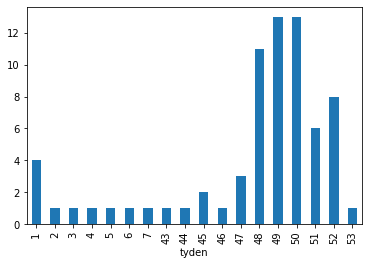

In [25]:
df[df['track'].isin(vanocni)].groupby("tyden")['rok'].nunique().plot.bar()

In [26]:
vsechnytydny = df['week'].drop_duplicates().to_list()

In [27]:
def cesta_pisne(seznam):
    pracovni = df
    pracovni = pracovni[(pracovni['track'].isin(seznam))].drop_duplicates(subset=['rok','tyden']).set_index("week", drop=True)
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    return pracovni['pozice'].plot(figsize=(20,5)).invert_yaxis()

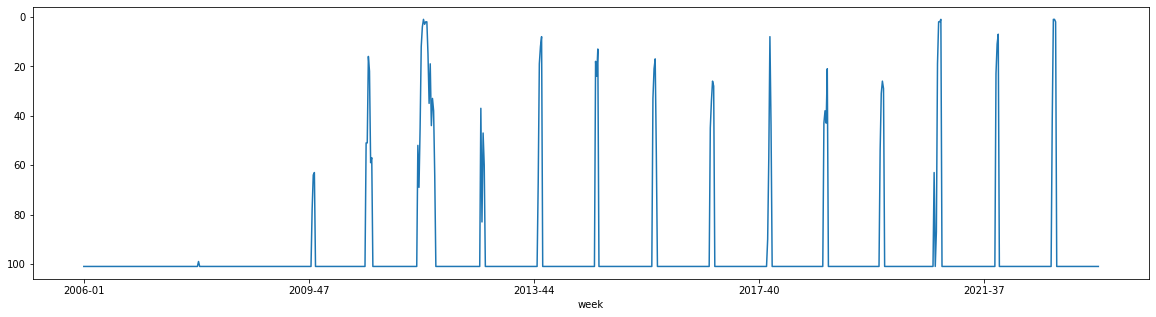

In [28]:
cesta_pisne(vanocni)

## Kdy nás ty tracky oblažily poprvé

In [29]:
df[df['track'].isin(vanocni)].groupby(['interpret','track'])['rok'].min().nsmallest(50)

interpret                          track                          
Wham!                              Last Christmas                     2008
Walda Gang                         Vánoční svařák                     2009
Train                              Shake Up Christmas                 2010
Lucie Vondráčková                  Vánoční strom                      2010
Coldplay                           Christmas Lights                   2010
Lucie Vondráčková Feat. R. Schwab  Vánoční přání                      2011
Václav Neckář & Umakart            Půlnoční                           2011
Janek Ledecký                      Sliby se maj plnit o Vánocích      2011
Mariah Carey                       All I Want For Christmas Is You    2011
Billy Mack                         Christmas Is All Around            2011
John Lennon                        Happy Xmas (War Is Over)           2012
Queen                              Thank God It´s Christmas           2012
Lucie Vondráčková & Kolář Petr   

## Radiožurnál

In [130]:
vanocni_l = [x.lower() for x in vanocni]

In [137]:
rz = pd.read_json(os.path.join("data","radiozurnal.json"))

In [138]:
rz['since'] = rz['since'].apply(lambda x: x.replace("01:00","02:00"))

In [139]:
rz['den'] = pd.to_datetime(rz['since']).dt.dayofyear

In [145]:
rz['since']

0         2020-12-01T00:38:45+02:00
1         2020-12-01T00:42:25+02:00
2         2020-12-01T00:48:18+02:00
3         2020-12-01T00:51:48+02:00
4         2020-12-01T00:55:41+02:00
                    ...            
218600    2023-10-22T23:07:32+02:00
218601    2023-10-22T23:15:56+02:00
218602    2023-10-22T23:25:35+02:00
218603    2023-10-22T23:34:17+02:00
218604    2023-10-22T23:47:09+02:00
Name: since, Length: 218605, dtype: object

In [149]:
rz['datum'] = rz['since'].apply(lambda x: f"""{x[5:10]}""")

In [141]:
rz['track'] = rz['track'].apply(lambda x: x.lower())

In [151]:
rz[rz['track'].isin(vanocni_l)]

,since,id,interpret,interpret_id,track,track_id,den,datum
897,2020-12-05T08:34:11+02:00,10256077,"Kryštof, Karel Gott",25130,vánoční,84268,340,12-05
1116,2020-12-06T09:33:53+02:00,10260165,John Lennon/ Yoko Ono,5548,happy xmas (war is over),15269,341,12-06
1257,2020-12-07T01:33:24+02:00,10262421,Shakin' Stevens,3166,merry christmas everyone,15175,342,12-07
1319,2020-12-07T07:34:18+02:00,10263597,Billy Mack,5527,christmas is all around,15098,342,12-07
1343,2020-12-07T10:33:38+02:00,10264374,"Václav Neckář, Umakart",5035,půlnoční,13362,342,12-07
...,...,...,...,...,...,...,...,...
157776,2022-12-26T10:15:00+02:00,16669025,Mariah Carey,3093,all i want for christmas is you,15232,360,12-26
157787,2022-12-26T11:16:53+02:00,16669591,John Lennon/ Yoko Ono,5548,happy xmas (war is over),15269,360,12-26
157798,2022-12-26T12:21:07+02:00,16670206,Billy Mack,5527,christmas is all around,15098,360,12-26
157845,2022-12-26T18:35:20+02:00,16673046,David Deyl & Kristína,31262,vánoční přání,104453,360,12-26


In [152]:
vanocni_rz = rz[rz['track'].isin(vanocni_l)]

In [153]:
vanocni_rz.groupby('datum').size()

datum
11-27     1
12-03     1
12-05     7
12-06     4
12-07    10
12-08     8
12-09     6
12-10     9
12-11     8
12-12     7
12-13    10
12-14    10
12-15     9
12-16     8
12-17     6
12-18     4
12-19     9
12-20    17
12-21    16
12-22    18
12-23    15
12-24    35
12-25    31
12-26    28
dtype: int64